Need to estimate the exposure times for H$\alpha$ observations of Virgo filament.

Websites with techical information about Megacam

* http://cfht.hawaii.edu/Instruments/
* http://cfht.hawaii.edu/Instruments/Filters/
* http://cfht.hawaii.edu/Instruments/Filters/curves/9603.png
* http://cfht.hawaii.edu/Instruments/Filters/megaprime.html

In [14]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from astropy.io import fits
import sys
sys.path.append('/Users/rfinn/Dropbox/pythonCode')
import chary_elbaz_24um as chary

## CFHT H$\alpha$ Filters

In [36]:
wave = np.array([6591, 6719],'f')
vr=np.array([2400.,3000.]) # recession velocity of filament
z=vr/3.e5
wave_rest=6563.
wave_obs=wave_rest*(z+1)
print wave_obs
(wave/wave_rest -1)*3.e5

[ 6615.504  6628.63 ]


array([ 1279.91442871,  7130.88525391], dtype=float32)

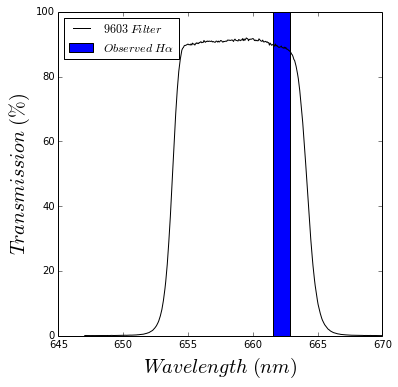

In [38]:
t=np.loadtxt('cfh9603.dat',delimiter=',')
fig=plt.figure(figsize=(6,6))
plt.subplots_adjust(bottom=.15,left=.15)
plt.plot(t[:,0],t[:,1],'k',label=r'$9603 \ Filter$')
x1=wave_rest/10.*(1+z[0])
x2=wave_rest/10.*(1+z[1])
#rect= plt.Rectangle((x1,0), (x2-x1), 100, color='.5',alpha=.5,label=r'$Observed \ H\alpha$')
#fig.gca().add_artist(rect)
plt.bar(x1,100,(x2-x1),color='b',label=r'$Observed \ H\alpha$')
#plt.axvline(x=wave_rest/10.*(1+z[0]),color='0.5',label=r'$Observed \ H\alpha$')
plt.legend(loc='upper left')

#plt.axvline(x=wave_rest/10.*(1+z[0]),color='b',)
#plt.axvline(x=wave_rest/10.*(1+z[1]),color='r')
plt.xlabel('$Wavelength \ (nm) $',fontsize=20)
plt.ylabel('$Transmission \ (\%) $',fontsize=20)
plt.savefig('FilterTransmission.eps')

## Comparison with 0.9-m Exposure Times

In [3]:
tHa_09m = 100. # min
tHa_CFHT = (.9/3.5)**2*tHa_09m
print tHa_CFHT

6.61224489796


## Observing Times

In [72]:
t_Ha = 15.
n_Ha = 3
t_r = t_Ha/3.
n_r = 3.
nfields = 17.
overhead=1.2
t_exp = (t_Ha*n_Ha + t_r*n_r)*nfields/60.
# estimating overhead
# 40 sec per exposure
# 1 min between dithers
# 5 min to acquire each pointings
overhead2 = (40./60*(n_Ha + n_r)*nfields + 1.*(n_Ha-1)*nfields + 5.*nfields)/60.
total=t_exp*overhead
print 'total on-source integration = ',t_exp
print 'total hours = ',total
print 'estimate 2 = ',t_exp + overhead2

total on-source integration =  17.0
total hours =  20.4
estimate 2 =  20.1166666667


## Estimate SFRs from 22um Fluxes

* Use a conversion from WISE Mag 4 to flux (not sure where I got this)
    * uses Eqn 2 and Table 1 from http://wise2.ipac.caltech.edu/docs/release/allsky/expsup/sec4_4h.html
    * assumes $f_c = 1$, which is a reasonable average of the spectral shapes listed in Table 2.

$$ fw4=8.363\times 10^{(- W4MAG3/2.5)} \times 10^6 $$

* convert flux to SFR using Chary & Elbaz code

* convert SFR to H-alpha line flux using kennicutt conversion
    * https://ned.ipac.caltech.edu/level5/Sept01/Rosa/Rosa3.html

$$ SFR(H\alpha) \ (M_\odot/yr) = 7.9 \times 10^{-42} L(H\alpha) \ (ergs/s) $$




In [3]:
nsafile='/Users/rfinn/research/NSA/nsa_v0_1_2.fits'
nsa=fits.getdata(nsafile)
# read in WISE catalog
wisefile='/Users/rfinn/research/NSA/nsa_v0_1_2_wise.fits'
wise=fits.getdata(wisefile)
# read in John's stellar masses
massfile='/Users/rfinn/research/NSA/nsa_v1_2_fsps_v2.4_miles_chab_charlot_sfhgrid01.fits'
jmass=fits.getdata(massfile)


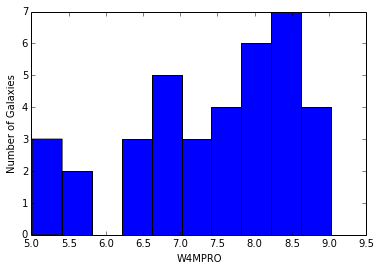

In [99]:
# estimate SFR from WISE 22um fluxes
ra_min=192
dec_min=17
dra=20
ddec=32
filamentflag = (nsa.RA > ra_min) & (nsa.RA < (ra_min + dra)) & (nsa.DEC > dec_min) & (nsa.DEC < (dec_min + ddec))
wiseflag = (wise.W4MPRO > 0.1) & (wise.W4SNR > 2.) 
mflag = (jmass.MSTAR_50 > 9.) & (jmass.MSTAR_50 < 10.)
wflag =  wiseflag & mflag &(nsa.ZDIST*3.e5 > 2200.) & (nsa.ZDIST*3.e5 < 3000.) & filamentflag

plt.figure()
plt.hist(wise.W4MPRO[wflag])
plt.xlabel('W4MPRO')
plt.ylabel('Number of Galaxies')

In [116]:
plt.figure()
z=nsa.ZDIST[wflag]
fw4=8.363*10.**(-1.*wise.W4MAG_3[wflag]/2.5)*1.e6 # flux in micro-Jansky
w4snr= wise.W4SNR[wflag]
Re = nsa.SERSIC_TH50[wflag]
ra = nsa.RA[wflag]
dec = nsa.DEC[wflag]
mstar=jmass.MSTAR_50[wflag]
#for i in range(len(z)): print z[i], fw4[i]

In [117]:
for i in range(len(ra)): print i, ra[i], dec[i]

0 204.205375551 44.8817559246
1 207.188182715 41.7099062661
2 207.162504363 43.4122663437
3 208.040875484 43.242986229
4 208.257912357 39.5808092654
5 208.103687132 39.5576150589
6 207.85571539 40.2132408466
7 200.088739887 41.4761486111
8 202.207370365 46.2623842488
9 202.041918305 46.6721054109
10 202.140264956 46.4999151824
11 202.138722612 46.9271746995
12 210.350104112 36.8000666865
13 209.987963583 38.2009296423
14 200.735153556 28.3164212001
15 208.145194681 38.705276569
16 198.626820438 35.3875042731
17 208.771231898 32.9028475617
18 196.448233357 27.7342017513
19 197.142974242 21.0497139316
20 198.174169838 22.8298213652
21 209.730455185 21.9884785312
22 199.914012647 30.2565890407
23 204.06522565 46.2000234052
24 205.124032377 42.9927228239
25 206.11823762 35.192588702
26 208.202017165 37.4909313909
27 208.498079533 39.7154857329
28 210.198604018 48.4438973483
29 194.458824331 29.6545410354
30 203.74256655 45.7801038175
31 204.602023275 33.1178733429
32 206.577724311 43.85135

In [102]:
ceLIR,ceSFR = chary.chary_elbaz_24um(z,fw4) # routine wants flux in uJy

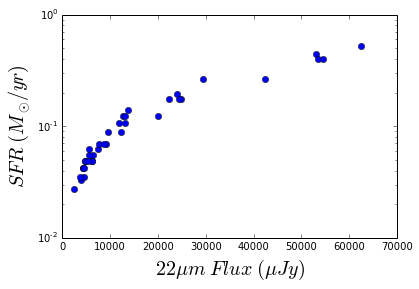

In [107]:
plt.figure()
plt.plot(fw4,ceSFR,'bo')
plt.xlabel('$22 \mu m \ Flux \ (\mu Jy) $',fontsize=20)
plt.ylabel('$SFR \ (M_\odot/yr) $',fontsize=20)
plt.gca().set_yscale('log')

In [122]:
# use Halpha conversion rate to get a line flux from SFR
kennconv=7.9e-42#Kenn 98 conversion fro SFR/yr / erg/s 
vr = 1000. #km/s
dL = vr/70. # in Mpc
dL = 16.
dL_cm = 3.086e24 * dL
# convert to erg/s in Halpha line
LHa = np.zeros(len(ceSFR),dtype=np.float64)
LHa = (ceSFR*(1./kennconv))
fHa = LHa/(4*np.pi*dL_cm**2)
sbHa = fHa/(4*np.pi*(1.*Re)**2)

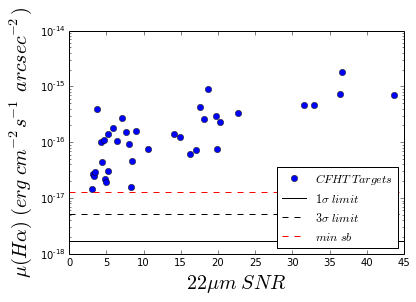

In [126]:
plt.figure()
plt.plot(w4snr,sbHa,'bo',label='$CFHT \ Targets$')
plt.gca().set_yscale('log')
plt.xlabel('$22 \mu m \ SNR$',fontsize=20)
plt.ylabel(r'$\mu (H \alpha)  \ (erg \ cm^{-2} s^{-1} \ arcsec^{-2} )$',fontsize=20)
plt.axhline(y=1.7e-18,label='$1 \sigma \ limit $',color='k')
plt.axhline(y=3.*1.7e-18,label='$3 \sigma \ limit $',color='k',ls='--')
plt.axhline(y=1.3e-17,label='$min \ sb $',color='r',ls='--')
plt.legend(numpoints=1,loc='lower right',scatterpoints=1)
plt.savefig('HalphaSB.png')

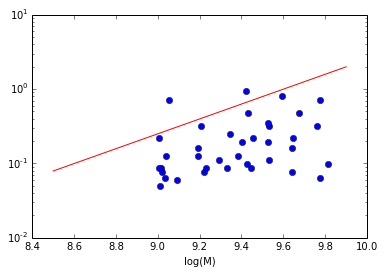

In [106]:
plt.figure()
plt.plot(jmass.MSTAR_50[wflag],1.8*ceSFR,'bo')
plt.gca().set_yscale('log')
xl=np.arange(8.5,10,.1)
# M*=1.e9, SFR=0.25Msol/year
yl = 10.**(xl - np.log10(4e9))
#yl=1*(xl-np.log10(4.e9))
plt.plot(xl,yl,'r-')
plt.xlabel('log(M)')

37